# Exercise: Automatic outlier removal on meteorological data

## Instructions
Here you will continue to work with the meteorological data from the previous exercise. This time you will be trying out two "automatic" (multivariate) outlier detection methods: [local outlier factor](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html) and [isolation forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html). 

1. Load data from the CSV file. 
2. A technical report on the data mentions that sensor 1's measurements of temperature and humidity are more reliable than sensor 2's. Drop the temperature and humidity columns for sensor 2 (`Temp2` and `hum2`).
3. Do a pairplot of the data. There are plenty of moments on which some sensor was malfunctionning. The pairplot may evidentiate suspicious data points.
3. This time we will try to filter out outliers on all columns at once. For each method:
    - Apply the method to the data. 
    - Vary the hyperparameters indicated in the instructions for each method.
    - Plot the correlation matrix and see the changes on the measured correlations before and after cleaning.
    - Repeat the pair plot and note the differences before and after cleaning.

# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import seaborn as sns

import plotly.express as px
#increase font size of all elements
sns.set(font_scale=1.5)


# Load the data



In [2]:
# read csv file
full_data = (pd.read_csv('data/donnee_Station_Meteo.csv', sep=';',
                       index_col=1,
                       parse_dates=[1])
            .dropna(how='all')
            .drop(columns=['id',' '])
            )
display(full_data.info())
display(full_data.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3036 entries, 2018-06-22 12:00:52 to 2022-01-31 07:08:40
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temp1          3036 non-null   float64
 1   hum1           3036 non-null   float64
 2   Pression       3036 non-null   float64
 3   Temp2          3036 non-null   float64
 4   hum2           3036 non-null   float64
 5   Conc_Stand_1   3036 non-null   int64  
 6   Conc_Stand_25  3036 non-null   int64  
 7   Conc_Stand_10  3036 non-null   int64  
 8   Conc_Env_1     3036 non-null   int64  
 9   Conc_Env_25    3036 non-null   int64  
 10  Conc_Env_10    3036 non-null   int64  
 11  Part_03        3036 non-null   int64  
 12  Part_05        3036 non-null   int64  
 13  Part_1         3036 non-null   int64  
 14  Part_25        3036 non-null   int64  
 15  Part_5         3036 non-null   int64  
 16  Part_50        3036 non-null   int64  
 17  Lum            3

None

,Temp1,hum1,Pression,Temp2,hum2,Conc_Stand_1,Conc_Stand_25,Conc_Stand_10,Conc_Env_1,Conc_Env_25,Conc_Env_10,Part_03,Part_05,Part_1,Part_25,Part_5,Part_50,Lum
time,,,,,,,,,,,,,,,,,,
2018-06-22 12:00:52,28.70,41.45,1011.88,29.07,50.52,6,10,22,6,10,22,0,0,0,0,0,0,51
2018-06-22 12:05:59,26.67,44.21,1011.90,26.63,53.92,6,9,9,6,9,9,1164,366,50,3,0,0,54
2018-06-22 12:11:05,25.63,46.44,1011.81,26.34,54.95,6,8,10,6,8,10,1164,340,37,5,2,0,22
2018-06-22 12:16:12,24.88,50.00,1011.77,26.07,57.26,7,8,9,7,8,9,1245,367,45,3,1,0,9
2018-06-22 12:21:19,24.95,49.12,1011.67,26.01,56.83,4,6,6,4,6,6,1182,332,28,2,0,0,11


# Select columns of interest

In [3]:
data = full_data.drop(columns=['Temp2', 'hum2'])

# Visualize data points

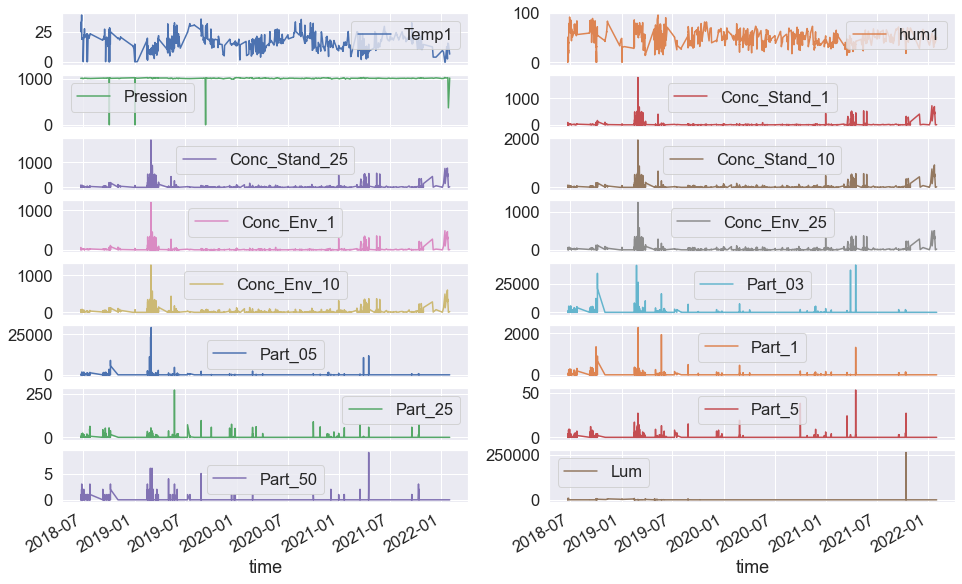

In [8]:
data.plot(subplots=True, layout=(8,2), figsize=(16,10));

In [4]:
px.scatter(data_frame=data)

# Pair plot


In [5]:
size = 1300
px.scatter_matrix(data, height=size, width=size)

In [6]:
# import plotly.figure_factory as ff
# fig = ff.create_scatterplotmatrix(data, diag='histogram', height=size, width=size)
# fig.show()

# Method 1: Local Outlier Factor

Check out the documentation: [`sklearn.neighbors.LocalOutlierFactor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)

Try different values for the following parameters:
- n_neighbors : try 20 (default) and 40
- contamination: try auto, 0.1, 0.01

Then check their effects on the max and min values for each column. Organize your results in a table or plot.

Finally, plot the resulting correlation matrix after cleaning. Do you have a different result than when you use simple univariate methods?


In [7]:
from sklearn.neighbors import LocalOutlierFactor

for n_neighbors in (20, 40):
    for contamination in ['auto', 0.1, 0.01]:
        estimator = LocalOutlierFactor(n_neighbors, contamination=contamination)
        estimator.fit(data)
        data['LOF_k_{n_neighbors}_c_{contamination}'] = estimator.fit_predict()(data)


# Method 2: Isolation Forest

Check out the documentation: [`sklearn.ensemble.IsolationForest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)

Try different values for the following parameters:
- n_estimators: try 100 (default) and 300
- contamination: try auto, 0.1, 0.01

Then check their effects on the max and min values for each column. Organize your results in a table or plot.

Finally, plot the resulting correlation matrix after cleaning. Do you have a different result than when you use simple univariate methods?


In [8]:
from sklearn.ensemble import IsolationForest

estimator = IsolationForest(random_state=42)

estimator.fit(data)


c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

c:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [ ]:

for n_estimators in (100, 300):
    for contamination in ['auto', 0.1, 0.01]:
        estimator = IsolationForest(
            n_estimators=n_estimators, contamination=contamination,
            random_state=42)
        scores = estimator.fit_predict(data)
        data['IF_n_{n_estimators}_c_{contamination}'] = scores